In [ ]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import networkx as nx

path = "Data/"

nets = []
nets_index = ["WDN_"+str(i) for i in range(1992, 2003)]
for index in nets_index:
    gml_file = path + index +".txt.graphml"
    G = nx.read_graphml(gml_file)
    nets.append(G)
figure_index = 10
def new_figure():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

In [3]:
### A06.1 code
def avg_nets_clustering(nets):
    clustering_coes = []
    for G in nets:
        clustering_coes.append(nx.average_clustering(G))
    return clustering_coes
def avg_nets_reciprocity(nets):
    reci_coes = []
    for G in nets:
        reci_coes.append(nx.reciprocity(G))
    return reci_coes
def output(nets):
    clusterings = avg_nets_clustering(nets)
    reciprocities = avg_nets_reciprocity(nets)
    for i in range(0, len(nets_index)):
        print(nets_index[i])
        print("average_clustering: " , clusterings[i])
        print("reciprocities: ", reciprocities[i])
        print("\n")


solution error = 1.519702834684722e-07


/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 1.0727063681770233e-09

solution error = 1.0023346277421297e-06

solution error = 4.89045604012972e-09

solution error = 1.622805697820695e-06

solution error = 2.6008066811300523e-09

solution error = 1.287327421550799e-06

solution error = 3.3631906148912094e-09

solution error = 1.1167066418238392e-06

solution error = 2.0966020031210064e-09

solution error = 2.2474324623544817e-09

solution error = 3.362060851941351e-09

solution error = 1.2140304761487641e-08

solution error = 4.447272772267752e-09

solution error = 6.818467852554022e-07

solution error = 3.1962201774149435e-09

solution error = 3.7707658862018434e-06

solution error = 1.8331043349917309e-09

solution error = 1.0321515020450533e-06

solution error = 4.093436700713937e-09

solution error = 8.419753783073247e-08

solution error = 2.33543318017837e-09


/var/folders/2h/fb8n9yjj29b27__wb9rw051c0000gn/T/ipykernel_903/3873640863.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figure_index)


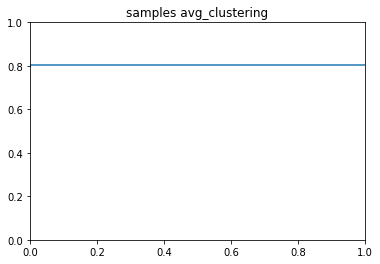

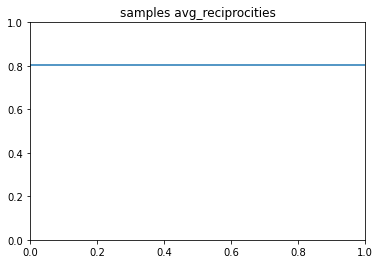

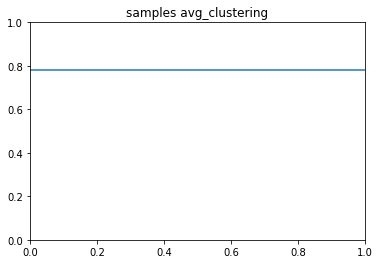

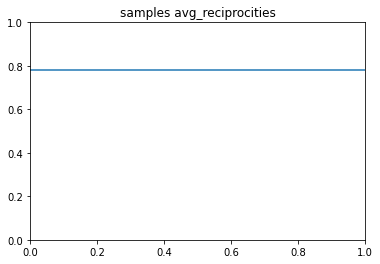

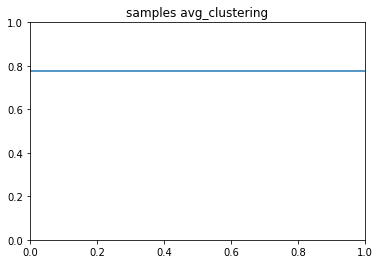

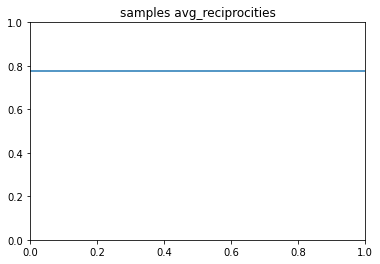

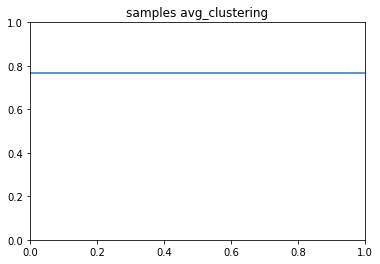

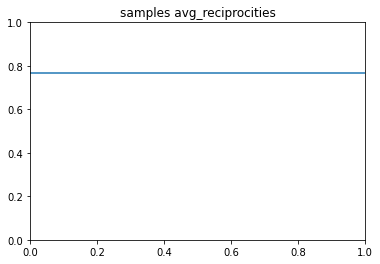

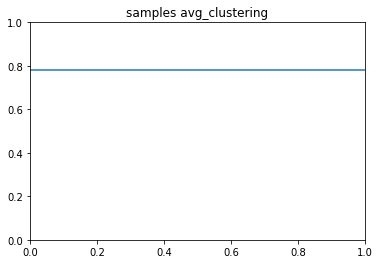

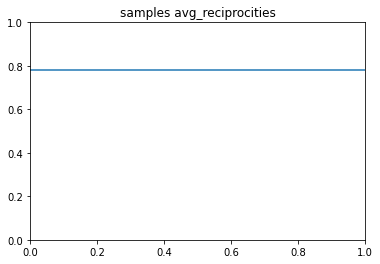

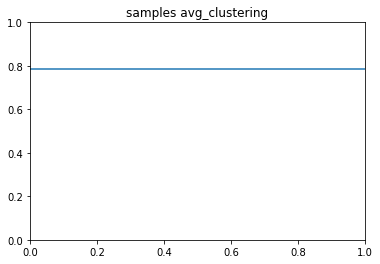

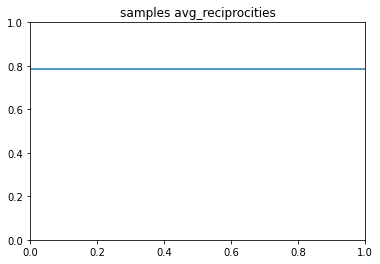

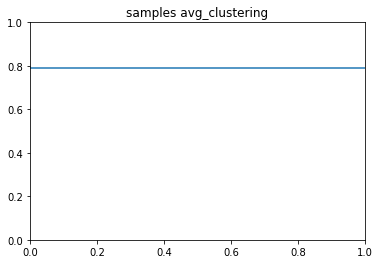

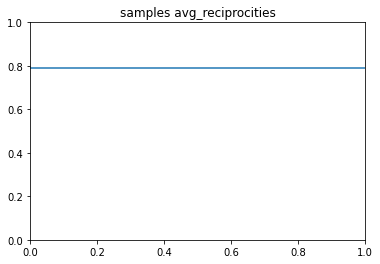

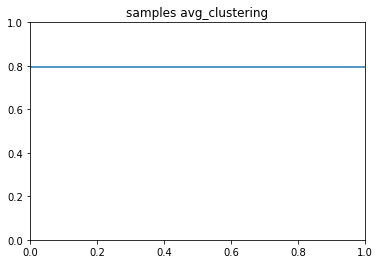

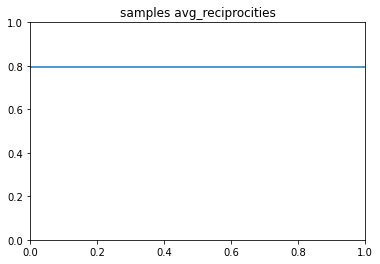

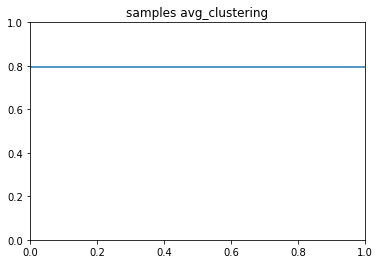

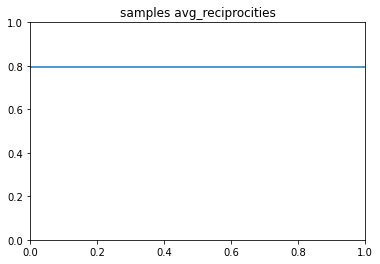

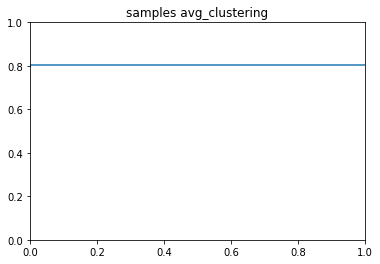

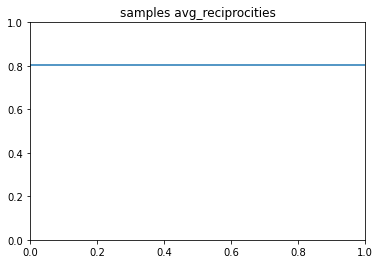

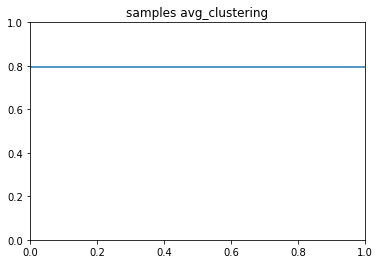

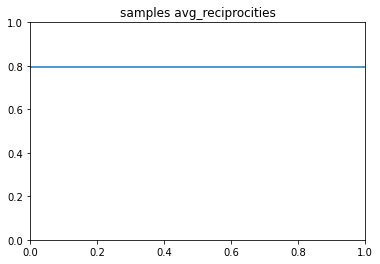

In [7]:
sample_count = 10
max_relative_error_strength = 0.01
def sample_UBCM(G, output_path):
    g_array = nx.to_numpy_array(G)
    UG = UndirectedGraph(g_array)
    UG.solve_tool(model="cm_exp")
    global sample_count
    global max_relative_error_strength
    step = 30
    current_max = 100
    while UG.relative_error_strength < max_relative_error_strength:
        UG.solve_tool(model="cm_exp", max_steps=current_max)
        current_max+=step
    UG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)
def sample_DBCM(G, output_path):
    g_array = nx.to_numpy_array(G)
    DG = DirectedGraph(g_array)
    DG.solve_tool(model="dcm_exp")

    global sample_count
    global max_relative_error_strength
    step = 30
    current_max = 100
    while DG.relative_error_strength < max_relative_error_strength:
        DG.solve_tool(model="dcm_exp", max_steps=(current_max))
        current_max+=step
    DG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def extract_samples(path, directed):
    nets = []
    global sample_count
    for i in range(sample_count):
        file = path + str(i) + ".txt"
        edges = np.loadtxt(file)
        if (directed):
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edgelist = edges,
                                      is_directed = False,
                                      is_sparse = False,
                                      is_weighted = True),
                            create_using=nx.DiGraph)
            nets.append(G)
        else:
            edges = np.loadtxt(f"sample/{i}.txt")
            G = nx.Graph()
            G.add_edges_from(edges)
            nets.append(G)
    return nets

def plot_sample(nets):
    for i in range(len(nets_index)):
        G = nets[i]

        original_clustering = nx.average_clustering(G)
        original_reciprocities = nx.average_clustering(G)

        sample_UBCM(G, "sample_UBCM_" + nets_index[i] + "/")

        DBCM_path="sample_DBCM_" + nets_index[i] + "/"
        sample_DBCM(G, DBCM_path)

        samples = extract_samples(DBCM_path, True)
        sample_clusterings = []
        sample_reciprocities = []
        for sample in samples:
            sample_clusterings.append(nx.average_clustering(sample))
            sample_reciprocities.append(nx.reciprocity(sample))
        sample_avg_clustering = np.mean(sample_clusterings)
        sample_avg_reciprocities = np.mean(sample_reciprocities)

        new_figure()
        plt.title(nets_index + " samples avg_clustering")
        plt.axhline(y=original_clustering, label="real value")

        new_figure()
        plt.title(nets_index + " samples avg_reciprocities")
        plt.axhline(y=original_reciprocities, label="real value")
plot_sample(nets)

### A06.1  - 1 coefficients

In [1]:
output(nets)

NameError: name 'output' is not defined

A06.1 - 3 plot

